Plot saved as LakeCore1.pdf


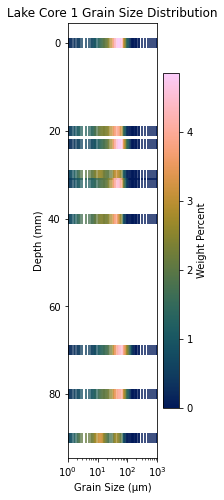

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cmcrameri
import os
import pandas as pd

def extract_depths(file_name):
    depths_str = file_name.split('_')[-1].split('-')
    try:
        lower_depth = float(depths_str[0].replace('mm', '').strip())
        upper_depth = float(depths_str[1].replace('mm', '').strip())
        return lower_depth, upper_depth
    except (ValueError, IndexError) as e:
        raise ValueError(f"Error processing file name: {file_name}. Ensure it follows the format 'filename_lower-upper.csv'.") from e

# Function to read data from multiple CSV files
def read_multiple_data(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)
            data = pd.read_csv(file_path)
            lower_depth, upper_depth = extract_depths(os.path.basename(file_path).split('.')[0])  # Extract depths from file name
            data['Lower Depth'] = lower_depth
            data['Upper Depth'] = upper_depth
            all_data.append(data)
    return pd.concat(all_data, ignore_index=True)

def plot_combined_data(combined_data, output_pdf='LakeCore1.pdf'):
    fig, ax1 = plt.subplots(figsize=(2, 8))  # Adjust the width and height (in inches) as needed

    # Plot weight percent
    cmap = cmcrameri.cm.batlow  # Using the 'batlow' colormap from cmcrameri
    norm = mcolors.Normalize(vmin=0, vmax=combined_data['Histogram (%) q3'].max())
    
    # Filter out NaN values
    combined_data_filtered = combined_data.dropna(subset=['um', 'Lower Depth', 'Histogram (%) q3'])

    sc = ax1.scatter(combined_data_filtered['um'], combined_data_filtered['Lower Depth'], c=combined_data_filtered['Histogram (%) q3'], cmap=cmap, norm=norm, marker="|", s=100)
    cbar = plt.colorbar(sc, ax=ax1, label='Weight Percent')
    
    # Reverse the y-axis
    ax1.set_ylim(ax1.get_ylim()[::-1])

    # Set x-axis to log scale with range from 1 to 1000
    ax1.set_xscale('log')
    ax1.set_xlim(1, 1000)  # Set the x-axis limit from 1 to 1000

    # Set labels and titles
    ax1.set_xlabel('Grain Size (μm)')
    ax1.set_ylabel('Depth (mm)')
    ax1.set_title('Lake Core 1 Grain Size Distribution')
    
    # Save the figure as a PDF
    plt.savefig(output_pdf, bbox_inches='tight', dpi=300)
    print(f"Plot saved as {output_pdf}")
    
    plt.show()

# Directory containing CSV files
directory = 'FILENAMEHERE'
# Read and combine data from multiple CSV files
combined_data = read_multiple_data(directory)

# Plot combined data
plot_combined_data(combined_data)
